In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import json

In [43]:
path = r'/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/ray_results' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for i, filename in enumerate(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    df['Hyperparameter set'] = i
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,timesteps_this_iter,done,timesteps_total,episodes_total,training_iteration,...,info/num_steps_sampled,info/sample_time_ms,info/replay_time_ms,info/grad_time_ms,info/update_time_ms,info/opt_peak_throughput,info/opt_samples,perf/cpu_util_percent,perf/ram_util_percent,Hyperparameter set
0,-4.161557,-4.161619,-4.161599,4.0,2500,10000,False,10000,2500,1,...,10000,1668179.997,0.000,0.000,0.001,0.000,0.0,97.977137,64.375916,0
1,-4.161584,-4.161616,-4.161606,4.0,2500,10000,False,20000,5000,2,...,20000,1567958.840,3759.144,6982.688,0.003,5728.453,40000.0,98.543387,63.434967,0
2,-4.161598,-4.161610,-4.161606,4.0,2500,10000,False,30000,7500,3,...,30000,1536945.849,3904.874,6780.918,0.003,5898.906,40000.0,94.145313,57.785464,0
3,-4.161599,-4.161610,-4.161606,4.0,2500,10000,False,40000,10000,4,...,40000,1519870.995,3910.159,6591.414,0.004,6068.500,40000.0,86.934588,56.538876,0
4,-4.161599,-4.161611,-4.161606,4.0,2500,10000,False,50000,12500,5,...,50000,1507673.720,3962.173,6586.352,0.003,6073.164,40000.0,88.953566,56.348396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-4.161598,-4.161611,-4.161606,4.0,2500,10000,False,960000,240000,96,...,960000,1413971.608,4141.573,6213.735,0.003,6437.352,40000.0,87.770833,57.506994,7
796,-4.161597,-4.161610,-4.161606,4.0,2500,10000,False,970000,242500,97,...,970000,1413153.109,4134.008,6192.351,0.003,6459.582,40000.0,90.162785,57.340089,7
797,-4.161599,-4.161610,-4.161606,4.0,2500,10000,False,980000,245000,98,...,980000,1412108.612,4146.223,6199.171,0.003,6452.475,40000.0,89.522993,57.046680,7
798,-4.161598,-4.161611,-4.161606,4.0,2500,10000,False,990000,247500,99,...,990000,1410895.703,4158.160,6208.086,0.003,6443.209,40000.0,91.130571,56.636427,7


In [44]:
frame.to_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/outputs/hyperparameter_tuning_training.csv")

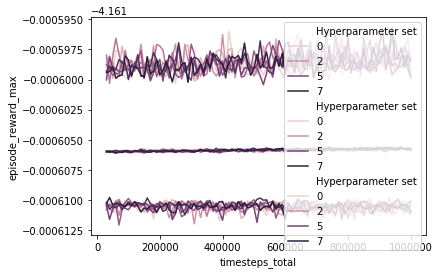

In [45]:
sns.lineplot(data=frame[frame.timesteps_total>20000], x='timesteps_total', y='episode_reward_min', hue='Hyperparameter set')
sns.lineplot(data=frame[frame.timesteps_total>20000], x='timesteps_total', y='episode_reward_mean', hue='Hyperparameter set')
sns.lineplot(data=frame[frame.timesteps_total>20000], x='timesteps_total', y='episode_reward_max', hue='Hyperparameter set')

# With actual hyper-parameters

In [46]:
rootdir = '/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/ray_results_total'

df_list = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
#         print(path)
        if "params.json" in path:
#             print(path)
            with open(path) as json_file:
                json_data = json.load(json_file)
            neuron_layers = json_data['critic_hiddens']
#             print(type(neuron_layers))
        if ".csv" in path:
#             print(path)    
            csv_file = pd.read_csv(path, index_col=None, header=0)
#         csv_file['neuron_params'] = neuron_layers
    csv_file['Hyperparameter set'] = "["+", ".join(str(x) for x in neuron_layers)+"]"
    df_list.append(csv_file)
#         print(csv_file.head())
        
total_frame = pd.concat(df_list, axis=0, ignore_index=True)
total_frame

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,timesteps_this_iter,done,timesteps_total,episodes_total,training_iteration,...,info/num_steps_sampled,info/sample_time_ms,info/replay_time_ms,info/grad_time_ms,info/update_time_ms,info/opt_peak_throughput,info/opt_samples,perf/cpu_util_percent,perf/ram_util_percent,Hyperparameter set
0,-4.161557,-4.161619,-4.161599,4.0,2500,10000,False,10000,2500,1,...,10000,1664505.389,0.000,0.000,0.003,0.000,0.0,93.527342,64.364430,"[400, 300]"
1,-4.161584,-4.161616,-4.161606,4.0,2500,10000,False,20000,5000,2,...,20000,1557203.783,4243.062,6945.798,0.004,5758.878,40000.0,86.325505,63.479740,"[400, 300]"
2,-4.161600,-4.161610,-4.161606,4.0,2500,10000,False,30000,7500,3,...,30000,1524984.882,4309.092,6556.942,0.004,6100.405,40000.0,91.338020,57.949211,"[400, 300]"
3,-4.161598,-4.161612,-4.161606,4.0,2500,10000,False,40000,10000,4,...,40000,1507202.379,4195.136,6457.458,0.003,6194.388,40000.0,90.706824,56.541663,"[400, 300]"
4,-4.161599,-4.161611,-4.161606,4.0,2500,10000,False,50000,12500,5,...,50000,1494267.316,4213.032,6449.593,0.003,6201.942,40000.0,95.210519,56.250073,"[400, 300]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-4.161599,-4.161610,-4.161606,4.0,2500,10000,False,960000,240000,96,...,960000,1426696.661,4070.964,6316.013,0.003,6333.109,40000.0,94.883521,57.184551,"[400, 300]"
896,-4.161599,-4.161611,-4.161606,4.0,2500,10000,False,970000,242500,97,...,970000,1425747.111,4055.958,6283.415,0.003,6365.965,40000.0,95.943103,57.240059,"[400, 300]"
897,-4.161599,-4.161611,-4.161606,4.0,2500,10000,False,980000,245000,98,...,980000,1423750.527,4060.589,6278.301,0.003,6371.150,40000.0,96.562976,56.850816,"[400, 300]"
898,-4.161598,-4.161611,-4.161606,4.0,2500,10000,False,990000,247500,99,...,990000,1422585.835,4060.579,6273.600,0.003,6375.925,40000.0,92.925369,56.827241,"[400, 300]"


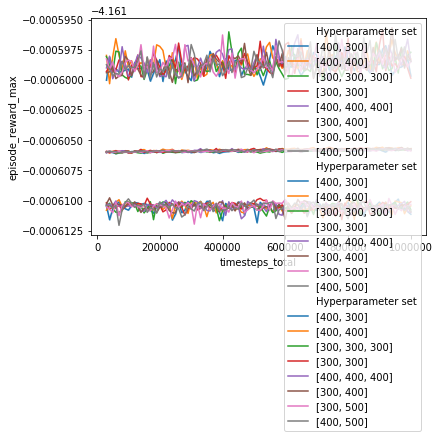

In [47]:
sns.lineplot(data=total_frame[total_frame.timesteps_total>20000], x='timesteps_total', y='episode_reward_min', hue='Hyperparameter set')
sns.lineplot(data=total_frame[total_frame.timesteps_total>20000], x='timesteps_total', y='episode_reward_mean', hue='Hyperparameter set')
sns.lineplot(data=total_frame[total_frame.timesteps_total>20000], x='timesteps_total', y='episode_reward_max', hue='Hyperparameter set')

In [48]:
total_frame.to_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/outputs/hyperparameter_tuning_training_with_params.csv")

